<b><u>Momenton Data Challenge</u></b>

<b>Problem Statement:</b> You have been engaged to provide insights for a movie production company. They want to understand the most popular movie genres, year by year, for the past decade by using user rating from tweets.
<br><b>Data Sources:</b> https://github.com/momenton/MovieTweetings/tree/master/snapshots/100K</br>
<br><b>Instructions:</b> You may use any language & submit via GitHub.</br>





In [38]:
# load packages to be used
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [39]:
#load in data
users = pd.read_csv('C:/Users/rebec/Downloads/momentontweets/users.dat', delimiter='::',
                    engine='python', header=None, names = ['userid', 'twitterid'])
movies = pd.read_csv('C:/Users/rebec/Downloads/momentontweets/movies.dat', delimiter='::',
                     engine='python', header=None, names = ['movieid', 'movie', 'genre'])
ratings = pd.read_csv('C:/Users/rebec/Downloads/momentontweets/ratings.dat', delimiter='::',
                      engine='python', header=None, names = ['userid', 'movieid', 'rating', 'ratingts'])

In [40]:
# check data
print(users.info())
print(movies.info())
print(ratings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16554 entries, 0 to 16553
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   userid     16554 non-null  int64
 1   twitterid  16554 non-null  int64
dtypes: int64(2)
memory usage: 258.8 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieid  10506 non-null  int64 
 1   movie    10506 non-null  object
 2   genre    10440 non-null  object
dtypes: int64(1), object(2)
memory usage: 246.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   userid    100000 non-null  int64
 1   movieid   100000 non-null  int64
 2   rating    100000 non-null  int64
 3   ratingts  100000 non-null  int64
dtypes: 

In [41]:
# fix movie data
movies = movies.dropna()
movies = movies.drop_duplicates().reset_index(drop=True)

In [42]:
# convert time
ratings['ratingts'] = pd.to_datetime(ratings['ratingts'], unit='s')
ratings.dtypes
print(ratings.head(5))

   userid  movieid  rating            ratingts
0       1  1074638       7 2013-04-03 22:45:07
1       1  1853728       8 2013-04-21 20:37:19
2       2   104257       8 2013-03-31 00:35:42
3       2  1259521       8 2013-03-24 09:47:27
4       2  1991245       7 2013-03-24 09:35:17


In [43]:
# check to see if timestamp spans a decade
mints = ratings['ratingts'].min()
maxts = ratings['ratingts'].max()
print(mints)
print(maxts)

2013-02-28 14:38:27
2013-09-01 20:27:45


In [44]:
# they don't so decade is based on year of movie made
# fix movie data by separating year
year = movies['movie'].str.split('(',expand=True)[1]
movies['year'] = year.str.split(')',expand=True)[0]
movies['year'] = movies['year'].astype('int')
movies['movie'] = movies['movie'].str.split('(',expand=True)[0]
print(movies.head(5))

   movieid                                     movie  \
0     2844  FantÃ´mas - Ã€ l'ombre de la guillotine    
1     4936                                 The Bank    
2     4972                    The Birth of a Nation    
3     5078                                The Cheat    
4     6684                              The Fireman    

                       genre  year  
0                Crime|Drama  1913  
1               Comedy|Short  1915  
2  Drama|History|Romance|War  1915  
3                      Drama  1915  
4               Short|Comedy  1916  


In [45]:
# create data frame from last decade (2010-2019)
decade = movies[movies['year']>2009]
print(decade.head(5))

      movieid               movie                            genre  year
4189   249516         Foodfight!    Animation|Action|Comedy|Family  2012
4767   337692        On the Road                   Adventure|Drama  2012
5055   376136      The Rum Diary     Comedy|Drama|Romance|Thriller  2011
5073   377981    Gnomeo & Juliet   Animation|Comedy|Family|Romance  2011
5122   383010  The Three Stooges                            Comedy  2012


In [46]:
# check data types
decade.dtypes

movieid     int64
movie      object
genre      object
year        int32
dtype: object

In [47]:
# create genres df splitting by repeating movieid lines for each genre
decade['genre'] = decade['genre'].astype(str)
genres = pd.DataFrame(decade.genre.str.split('|').tolist(), index=decade.movieid).stack()
genres = genres.reset_index([0, 'movieid'])
genres.columns = ['movieid', 'genre']
print(genres.head(5))

   movieid      genre
0   249516  Animation
1   249516     Action
2   249516     Comedy
3   249516     Family
4   337692  Adventure


C:\Users\rebec\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [48]:
# average out movie rating
avgratings =  ratings.drop(ratings.columns[[0, 3]], axis=1)
avgratings = avgratings.groupby('movieid').mean()
print(avgratings.head(5))

         rating
movieid        
2844        6.0
4936        6.5
4972        8.0
5078        4.0
6684        6.0


In [49]:
# join data set
join = pd.merge(genres,avgratings, on = 'movieid')
print(join.head(5))

   movieid      genre    rating
0   249516  Animation  1.000000
1   249516     Action  1.000000
2   249516     Comedy  1.000000
3   249516     Family  1.000000
4   337692  Adventure  6.114286


In [50]:
# bring in year
year =  decade.drop(decade.columns[[1,2]], axis=1)
temp =  pd.merge(join, year, on = 'movieid')
print(temp.head(5))

   movieid      genre    rating  year
0   249516  Animation  1.000000  2012
1   249516     Action  1.000000  2012
2   249516     Comedy  1.000000  2012
3   249516     Family  1.000000  2012
4   337692  Adventure  6.114286  2012


In [51]:
# average out movie rating
df =  temp.drop(temp.columns[[0]], axis=1)
df = df.groupby(['year', 'genre'], as_index = False)['rating'].mean()
print(df.head(5))

   year      genre    rating
0  2010     Action  6.611668
1  2010  Adventure  6.666123
2  2010  Animation  6.874640
3  2010  Biography  7.200727
4  2010     Comedy  6.720050


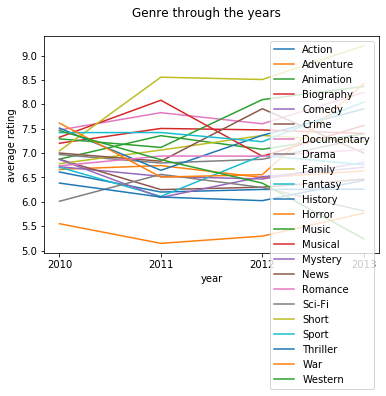

In [52]:
# plot data
fig, ax = plt.subplots()
plt.xticks(np.arange(min(df['year']), max(df['year'])+1, 1))
plt.suptitle('Genre through the years', fontsize = 12)
ax.set_ylabel('average rating')
for name, group in df.groupby('genre'):
    group.plot(x = 'year', y = 'rating', ax = ax, label = name)

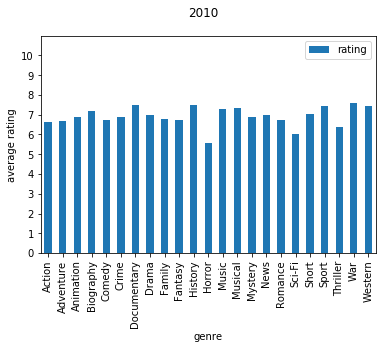

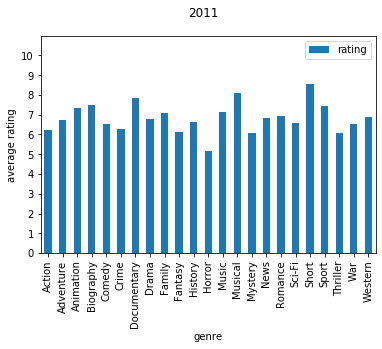

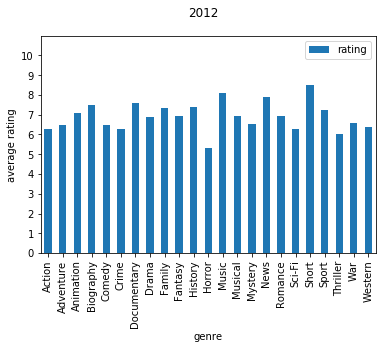

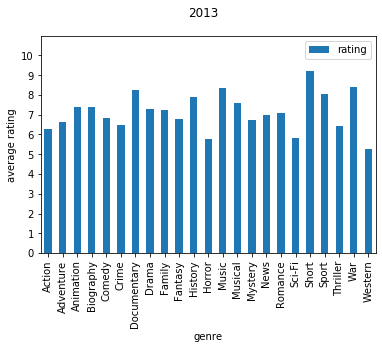

In [53]:
# that was ugly so lets segment by year amd place in a bar chart
for i, group in df.groupby('year'):
    fig, ax = plt.subplots()
    plt.suptitle(i)
    ax.set_ylabel('average rating')
    ax.set_yticks(np.arange(0, 11, step=1))
    ax.set_ylim(ymax=11)
    group.plot.bar(x = 'genre', y = 'rating', ax = ax)

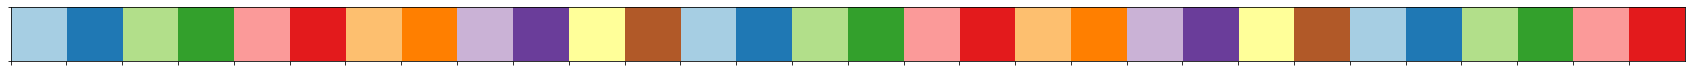

In [54]:
# lets make it a bit nicer by adding a colour palette
sns.palplot(sns.color_palette('Paired', 30))
color_labels = df['genre'].unique()
rgb_values = sns.color_palette('Paired', 30)
color_map = dict(zip(color_labels, rgb_values))

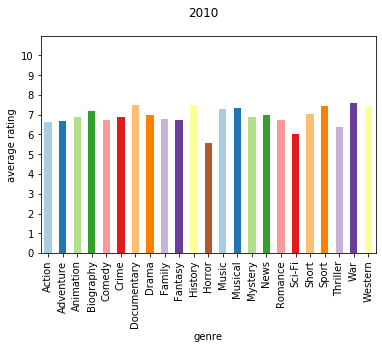

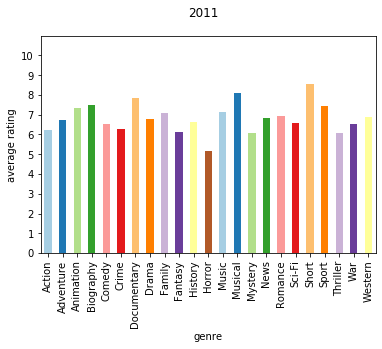

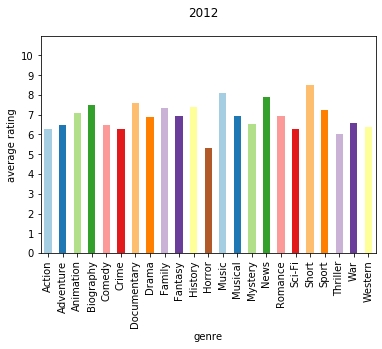

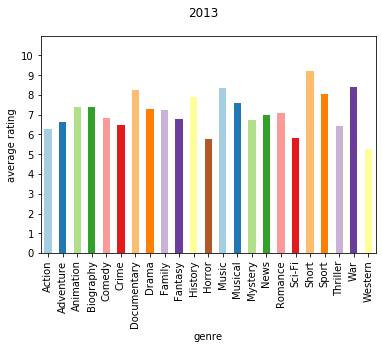

In [55]:
# apply to charts
for i, group in df.groupby('year'):
    fig, ax = plt.subplots()
    plt.suptitle(i)
    ax.set_ylabel('average rating')
    ax.set_yticks(np.arange(0, 11, step=1))
    ax.set_ylim(ymax=11)
    group.plot.bar(x = 'genre', y = 'rating', ax = ax, color=df['genre'].map(color_map), legend = False)

Above is a visual representation by year for how each genre performed using their average ratings.
I would prefer to process data in code present in Tableau but this task called for code only :)